In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [6]:
text= open('loseyourself.txt').read()
corpus = text.lower().split("\n")

In [7]:
corpus[0:5]

['look',
 'if you had',
 'one shot',
 'or one opportunity',
 'to seize everything you ever wanted']

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'you': 1, 'the': 2, 'to': 3, 'in': 4, 'it': 5, 'better': 6, 'this': 7, 'he': 8, 'and': 9, 'a': 10, 'only': 11, 'one': 12, "he's": 13, 'but': 14, 'i': 15, 'shot': 16, 'go': 17, 'opportunity': 18, 'moment': 19, 'not': 20, 'your': 21, 'is': 22, 'let': 23, 'on': 24, 'goes': 25, 'own': 26, 'get': 27, 'do': 28, 'his': 29, 'so': 30, 'no': 31, 'lose': 32, 'yourself': 33, 'music': 34, 'never': 35, 'miss': 36, 'chance': 37, 'blow': 38, 'comes': 39, 'once': 40, 'lifetime': 41, 'my': 42, 'up': 43, 'that': 44, 'knows': 45, 'these': 46, 'da': 47, 'or': 48, "don't": 49, "it's": 50, 'me': 51, 'all': 52, 'are': 53, 'whole': 54, "won't": 55, 'out': 56, 'back': 57, 'home': 58, 'him': 59, 'for': 60, 'life': 61, 'got': 62, 'capture': 63, 'yo': 64, "there's": 65, 'what': 66, 'times': 67, 'over': 68, 'ope': 69, 'there': 70, 'when': 71, 'world': 72, 'as': 73, 'grows': 74, 'harder': 75, 'hoes': 76, 'coast': 77, 'father': 78, 'nose': 79, "'cause": 80, 'here': 81, 'cold': 82, 'water': 83, 'next': 84, 'old': 85,

In [9]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [10]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=50, verbose=1)
#print model.summary()
print(model)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
22/22 [==============================] - 5s 59ms/step - loss: 5.5488 - accuracy: 0.0298
Epoch 2/50
22/22 [==============================] - 1s 57ms/step - loss: 4.5852 - accuracy: 0.1222
Epoch 3/50
22/22 [==============================] - 1s 58ms/step - loss: 3.8005 - accuracy: 0.2514
Epoch 4/50
22/22 [==============================] - 1s 57ms/step - loss: 3.0434 - accuracy: 0.3210
Epoch 5/50
22/22 [==============================] - 1s 56ms/step - loss: 2.2150 - accuracy: 0.4403
Epoch 6/50
22/22 [==============================] - 1s 57ms/step - loss: 1.4903 - accuracy: 0.6080
Epoch 7/50
22/22 [==============================] - 1s 57ms/step - loss: 0.8945 - accuracy: 0.7614
Epoch 8/50
22/22 [==============================] - 1s 56ms/step - loss: 0.5102 - accuracy: 0.8494
Epoch 9/50
22/22 [==============================] - 1s 55ms/step - loss: 0.2967 - accuracy: 0.9176
Epoch 10/50
22/22 [==============================] - 1s 55ms/step - loss: 0.1899 - accuracy: 0.9361
Epoch 11/

In [11]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

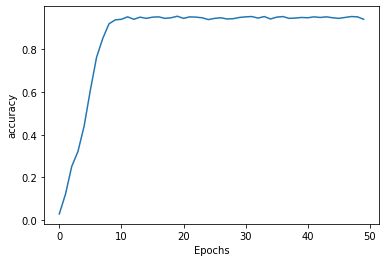

In [12]:
plot_graphs(history, 'accuracy')

In [29]:
seed_text = "this moment you own it"
next_words = 10
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


this moment you own it you better never let it go go go i go
